<a href="https://colab.research.google.com/github/dkaybee2022/Python-with-Excel/blob/main/updated_burton_dummy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the Dummy_Data Excel file
uploaded = files.upload()

Saving Dummy Data for Python.xlsx to Dummy Data for Python (4).xlsx


In [ ]:
df = pd.read_excel('Dummy Data for Python.xlsx', sheet_name='Dummy_Data')

In [ ]:
import pandas as pd
#Load Data excel file
input_file = 'Dummy Data for Python.xlsx'
output_file = 'Categorized_Data.xlsx'
print(input_file)
print (df.head)

Dummy Data for Python.xlsx
<bound method NDFrame.head of                                               File Path File Type  size_mb  \
0     \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.050   
1     \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.050   
2     \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.050   
3     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
4     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
...                                                 ...       ...      ...   
1118  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1119  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1120  \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.012   
1121  \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.012   
1122  \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.012   

      

In [ ]:
df = pd.read_excel('Dummy Data for Python.xlsx', sheet_name='Dummy_Data')


In [ ]:
print('Dummy Data for Python:')
print(df.head())

Dummy Data for Python:
                                           File Path File Type  size_mb  \
0  \\DURHAM_DUMMY\Department Files\Data Analytics...      data     0.05   
1  \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl     0.05   
2  \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx     0.05   
3  \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf     0.05   
4  \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf     0.05   

   last_modified  
0           2024  
1           2024  
2           2024  
3           2024  
4           2024  


In [ ]:

df['last_modified'] = df['last_modified'].astype(str)
#Extract Year
df['last_modified_year'] = df['last_modified'].str.extract(r'(\d{4})').astype(int)


In [ ]:
counts = {
        '2021-2024': {'count': 0, 'total_size_MB': 0},
        '2015-2020': {'count': 0, 'total_size_MB': 0},
        'before_2014': {'count': 0, 'total_size_MB': 0},
    }


In [ ]:
for index, row in df.iterrows():
    year = row['last_modified_year']


    size = row['size_mb']

    if 2021 <= year <= 2024:
        counts['2021-2024']['count'] += 1
        counts['2021-2024']['total_size_MB'] += size
    elif 2015 <= year <= 2020:
        counts['2015-2020']['count'] += 1
        counts['2015-2020']['total_size_MB'] += size
    elif year < 2014:
        counts['before_2014']['count'] += 1
        counts['before_2014']['total_size_MB'] += size

In [ ]:
import pandas as pd

# ... (Your existing code to read data and create df) ...

# 1. Initialize counts dictionary
counts = {
    '2021-2024': {'count': 0, 'total_size_MB': 0},
    '2015-2020': {'count': 0, 'total_size_MB': 0},
    'before_2014': {'count': 0, 'total_size_MB': 0},
    '2014-2015': {'count': 0, 'total_size_MB': 0}
}

# 2. Categorize and count
uncategorized_years = []  # To store years that don't fit categories

for index, row in df.iterrows():
    year = row['last_modified_year']
    size = row['size_mb']

    if 2021 <= year <= 2024:
        category = '2021-2024'
    elif 2015 <= year <= 2020:
        category = '2015-2020'
    elif year < 2014:
        category = 'before_2014'
    elif 2014 <= year <= 2015:
        category = '2014-2015'
    else:
        uncategorized_years.append(year)  # Collect uncategorized years
        continue  # Skip to the next row

    counts[category]['count'] += 1
    counts[category]['total_size_MB'] += size

# 3. Print detailed summary
total_categorized_files = sum(counts[cat]['count'] for cat in counts)

print("Detailed Category Counts:")
for category, data in counts.items():
    print(f"{category}: {data['count']}")

print(f"\nTotal Categorized Files: {total_categorized_files}")
print(f"Total Records in DataFrame: {len(df)}")

# 4. Print uncategorized years (if any)
if uncategorized_years:
    print("\nUncategorized Years:")
    print(set(uncategorized_years))  # Print unique uncategorized years
    print(f"Number of Uncategorized Files: {len(uncategorized_years)}")

Detailed Category Counts:
2021-2024: 278
2015-2020: 347
before_2014: 221
2014-2015: 277

Total Categorized Files: 1123
Total Records in DataFrame: 1123


In [ ]:

df['Files_2021_2024'] = counts['2021-2024']['count']
df['Size_2021_2024_MB'] = counts['2021-2024']['total_size_MB']
df['Files_2015_2020'] = counts['2015-2020']['count']
df['Size_2015_2020_MB'] = counts['2015-2020']['total_size_MB']
df['Files_before_2014'] = counts['before_2014']['count']
df['Size_before_2014_MB'] = counts['before_2014']['total_size_MB']
df['Files_2014_2015'] = counts['2014-2015']['count']
df['Size_2014_2015_MB'] = counts['2014-2015']['total_size_MB']


print("\nData with categorized file counts and sizes:")

# Allcategories
print(df[['last_modified', 'size_mb',
           'Files_2021_2024', 'Size_2021_2024_MB',
           'Files_2015_2020', 'Size_2015_2020_MB',
           'Files_before_2014', 'Size_before_2014_MB',
           'Files_2014_2015', 'Size_2014_2015_MB']].head())

print(df.head)


Data with categorized file counts and sizes:
  last_modified  size_mb  Files_2021_2024  Size_2021_2024_MB  Files_2015_2020  \
0          2024     0.05              278               13.6              347   
1          2024     0.05              278               13.6              347   
2          2024     0.05              278               13.6              347   
3          2024     0.05              278               13.6              347   
4          2024     0.05              278               13.6              347   

   Size_2015_2020_MB  Files_before_2014  Size_before_2014_MB  Files_2014_2015  \
0             20.615                221               36.204              277   
1             20.615                221               36.204              277   
2             20.615                221               36.204              277   
3             20.615                221               36.204              277   
4             20.615                221               36.204  

In [ ]:


counts = {
    '2021-2024': {'count': 0, 'total_size_MB': 0},
    '2015-2020': {'count': 0, 'total_size_MB': 0},
    'before_2014': {'count': 0, 'total_size_MB': 0},
    '2014-2015': {'count': 0, 'total_size_MB': 0}
}

for index, row in df.iterrows():
    year = row['last_modified_year']
    size = row['size_mb']

    if 2021 <= year <= 2024:
        category = '2021-2024'
    elif 2015 <= year <= 2020:
        category = '2015-2020'
    elif year < 2014:
        category = 'before_2014'
    elif 2014 <= year <= 2015:
        category = '2014-2015'
    else:
        # Handle unexpected years (e.g., raise an exception or print a warning)
        # You might want to print a warning or handle these cases differently
        print(f"Warning: Unexpected year value: {year}. Skipping this row.")
        continue  # Skip to the next row if year is unexpected

    counts[category]['count'] += 1
    counts[category]['total_size_MB'] += size

In [ ]:
import pandas as pd

total_records = len(df)
print(f"Total records in the original file: {total_records}")

# Verify
total_files_in_summary = summary_df['File Count'].sum()
print(f"Total files in the summary: {total_files_in_summary}")

# Test count
if total_records == total_files_in_summary:
    print("Summary data is consistent with the original file.")
else:
    print("WARNING: Summary data does not match the original file. There might be an error.")

Total records in the original file: 1123
Total files in the summary: 1123
Summary data is consistent with the original file.


In [ ]:
import pandas as pd



summary_data = {
    'Category': ['2021-2024', '2015-2020', 'before_2014', '2014-2015'],  # Add 2014-2015
    'File Count': [counts['2021-2024']['count'],
                   counts['2015-2020']['count'],
                   counts['before_2014']['count'],
                   counts['2014-2015']['count']],
    'Total Size (MB)': [counts['2021-2024']['total_size_MB'],
                        counts['2015-2020']['total_size_MB'],
                        counts['before_2014']['total_size_MB'],
                        counts['2014-2015']['total_size_MB']]
}
summary_df = pd.DataFrame(summary_data)
print("\nSummary DataFrame:")
print(summary_df)
# Summary Data
summary_df.to_excel(output_file, index=False)
print(f"Summary data successfully saved to '{output_file}'")


Summary DataFrame:
      Category  File Count  Total Size (MB)
0    2021-2024         278           13.600
1    2015-2020         347           20.615
2  before_2014         221           36.204
3    2014-2015         277           55.400
Summary data successfully saved to 'Categorized_Data.xlsx'


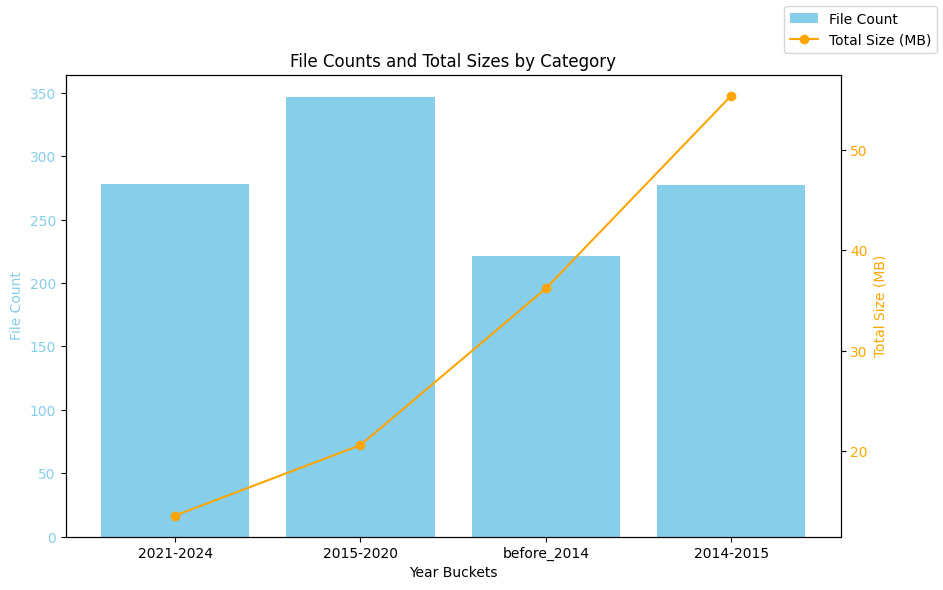

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bar Chart
fig, ax1 = plt.subplots(figsize=(10, 6))

#  File Count
ax1.bar(summary_df['Category'], summary_df['File Count'], color='skyblue', label='File Count')
ax1.set_xlabel('Year Buckets')
ax1.set_ylabel('File Count', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Y-axis for Total Size (MB)
ax2 = ax1.twinx()
ax2.plot(summary_df['Category'], summary_df['Total Size (MB)'], color='orange', marker='o', label='Total Size (MB)')
ax2.set_ylabel('Total Size (MB)', color='orange')
ax2.tick_params('y', labelcolor='orange')

# Title
plt.title('File Counts and Total Sizes by Category')
fig.legend(loc="upper right")

# Display the chart
plt.show()

In [ ]:
import pandas as pd

counts = {
    '2021-2024': {'count': 0, 'total_size_MB': 0},
    '2015-2020': {'count': 0, 'total_size_MB': 0},
    'before_2014': {'count': 0, 'total_size_MB': 0},
    '2014-2015': {'count': 0, 'total_size_MB': 0}  # Include 2014-2015
}


for index, row in df.iterrows():
    year = row['last_modified_year']
    size = row['size_mb']

    if 2021 <= year <= 2024:
        category = '2021-2024'
    elif 2015 <= year <= 2020:
        category = '2015-2020'
    elif year < 2014:
        category = 'before_2014'
    elif 2014 <= year <= 2015:
        category = '2014-2015'
    else:

        print(f"Warning: Unexpected year value: {year}. Skipping this row.")
        continue

    counts[category]['count'] += 1
    counts[category]['total_size_MB'] += size



In [ ]:
import pandas as pd


counts = {
    '2021-2024': {'count': 0, 'total_size_MB': 0},
    '2015-2020': {'count': 0, 'total_size_MB': 0},
    'before_2014': {'count': 0, 'total_size_MB': 0},
    '2014-2015': {'count': 0, 'total_size_MB': 0}
}

for index, row in df.iterrows():
    year = row['last_modified_year']
    size = row['size_mb']

    if 2021 <= year <= 2024:
        category = '2021-2024'
    elif 2015 <= year <= 2020:
        category = '2015-2020'
    elif year < 2014:
        category = 'before_2014'
    elif 2014 <= year <= 2015:
        category = '2014-2015'
    else:

        raise ValueError(f"Unexpected year value: {year}")


    counts[category]['count'] += 1
    counts[category]['total_size_MB'] += size

# Create summary DataFrame
summary_data = {
    'Category': list(counts.keys()),
    'File Count': [counts[cat]['count'] for cat in counts],
    'Total Size (MB)': [counts[cat]['total_size_MB'] for cat in counts]
}
summary_df = pd.DataFrame(summary_data)



total_records = len(df)
total_files_in_summary = summary_df['File Count'].sum()

if total_records == total_files_in_summary:
    print("Summary data is consistent with the original file.")
else:
    print("WARNING: Summary data does not match the original file. There might be an error.")

Summary data is consistent with the original file.


In [ ]:
#New Excel File
df.to_excel(output_file, index=False)
print(f"Data successfully categorized and saved to '{output_file}'")

Data successfully categorized and saved to 'Categorized_Data.xlsx'


In [ ]:
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Download the file
files.download(output_file)
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,File Path,File Type,size_mb,last_modified,last_modified_year,Files_2021_2024,Size_2021_2024_MB,Files_2015_2020,Size_2015_2020_MB,Files_before_2014,Size_before_2014_MB
0,\\DURHAM_DUMMY\Department Files\Data Analytics...,data,0.05,2024,2024,278,13.6,347,20.615,221,36.204
1,\\DURHAM_DUMMY\Department Files\Data Analytics...,rdl,0.05,2024,2024,278,13.6,347,20.615,221,36.204
2,\\DURHAM_DUMMY\Department Files\Data Analytics...,xlsx,0.05,2024,2024,278,13.6,347,20.615,221,36.204
3,\\DURHAM_DUMMY\Department Files\Data Analytics...,pdf,0.05,2024,2024,278,13.6,347,20.615,221,36.204
4,\\DURHAM_DUMMY\Department Files\Data Analytics...,pdf,0.05,2024,2024,278,13.6,347,20.615,221,36.204


In [ ]:
print(df.head())


                                           File Path File Type  size_mb  \
0  \\DURHAM_DUMMY\Department Files\Data Analytics...      data     0.05   
1  \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl     0.05   
2  \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx     0.05   
3  \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf     0.05   
4  \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf     0.05   

  last_modified  last_modified_year  Files_2021_2024  Size_2021_2024_MB  \
0          2024                2024              278               13.6   
1          2024                2024              278               13.6   
2          2024                2024              278               13.6   
3          2024                2024              278               13.6   
4          2024                2024              278               13.6   

   Files_2015_2020  Size_2015_2020_MB  Files_before_2014  Size_before_2014_MB  
0              347

In [ ]:
print("Dummy Data for Python:")
print(df.head)

Dummy Data for Python:
<bound method NDFrame.head of                                               File Path File Type  size_mb  \
0     \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.050   
1     \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.050   
2     \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.050   
3     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
4     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
...                                                 ...       ...      ...   
1118  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1119  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1120  \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.012   
1121  \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.012   
1122  \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.012   

     last_

In [ ]:
print("\nColumns in the DataFrame:")
print(df.columns)


Columns in the DataFrame:
Index(['File Path', 'File Type', 'size_mb', 'last_modified',
       'last_modified_year', 'Files_2021_2024', 'Size_2021_2024_MB',
       'Files_2015_2020', 'Size_2015_2020_MB', 'Files_before_2014',
       'Size_before_2014_MB'],
      dtype='object')


In [ ]:
print (output_file)
print (df.head)

Categorized_Data.xlsx
<bound method NDFrame.head of                                               File Path File Type  size_mb  \
0     \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.050   
1     \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.050   
2     \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.050   
3     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
4     \\DURHAM_DUMMY\Department Files\Data Analytics...       pdf    0.050   
...                                                 ...       ...      ...   
1118  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1119  \\DURHAM_DUMMY\Department Files\Data Analytics...      docx    0.012   
1120  \\DURHAM_DUMMY\Department Files\Data Analytics...      data    0.012   
1121  \\DURHAM_DUMMY\Department Files\Data Analytics...       rdl    0.012   
1122  \\DURHAM_DUMMY\Department Files\Data Analytics...      xlsx    0.012   

     last_m